In [1]:
import pandas as pd

In [2]:
fname = 'data.csv'

In [28]:
pet.head()

,Week of,Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products Thousand Barrels
0,2017-09-15,1305605
1,2017-09-08,1312163
2,2017-09-01,1310418
3,2017-08-25,1303390
4,2017-08-18,1304490


,Stocks
Week,
1990-01-05,1004329
1990-01-12,1013190
1990-01-19,1019846
1990-01-26,1032697
1990-02-02,1050719


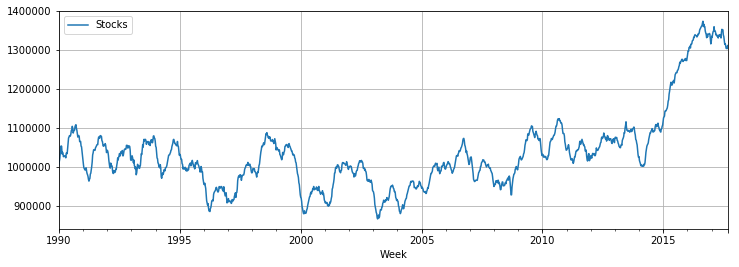

In [30]:
%matplotlib inline
pet = pd.read_csv('data.csv',header=4,parse_dates=[0])
pet.columns = ['Week','Stocks']
pet = pet.set_index('Week')
pet = pet.sort_index()
pet.plot(grid=True,figsize=(12,4))
pet.head()

In [34]:
pet['Change'] = pet['Stocks'].diff()
pet = pet.dropna()
pet.head()

,Stocks,Change
Week,,
1990-01-12,1013190,8861.0
1990-01-19,1019846,6656.0
1990-01-26,1032697,12851.0
1990-02-02,1050719,18022.0
1990-02-09,1053257,2538.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aedf668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d3a03c8>], dtype=object)

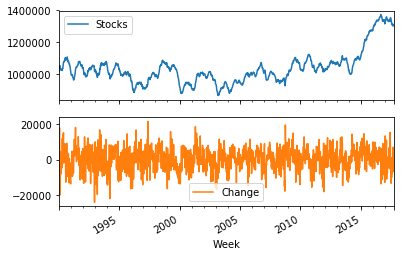

In [36]:
pet.plot(subplots=True)

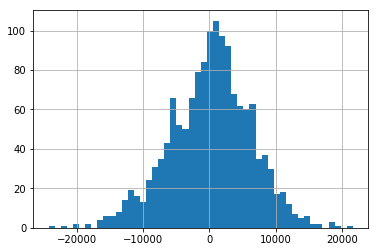

In [40]:
pet['Change'].hist(bins=50)

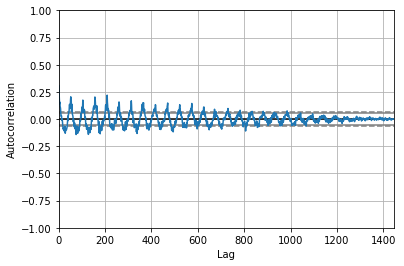

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pet['Change'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11da9e6a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e3100f0>], dtype=object)

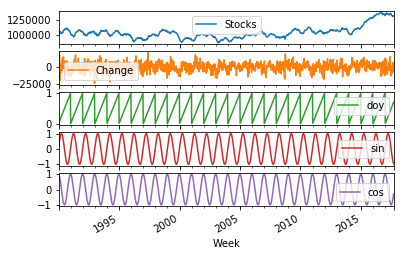

In [46]:
import numpy as np
pet['doy'] = pet.index.dayofyear/365.25
pet['sin'] = np.sin(2*np.pi*pet['doy'])
pet['cos'] = np.cos(2*np.pi*pet['doy'])
pet.plot(subplots=True)

In [47]:
import statsmodels.formula.api as sm
result = sm.ols(formula = 'Change ~ sin + cos', data = pet).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     91.67
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           3.33e-38
Time:                        10:21:49   Log-Likelihood:                -14576.
No. Observations:                1445   AIC:                         2.916e+04
Df Residuals:                    1442   BIC:                         2.917e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.5433    153.133      1.199      0.231    -116.844     483.931
sin         1060.3226    216.599      4.895      0.000     635.439    1485.206
cos        -2739.1677    216.514    -12.651      0.000   -3163.883   -2314.452
==============================================================================
Omnibus:                       13.465   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.383
Skew:                          -0.122   Prob(JB):                     0.000168
Kurtosis:                       3.479   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
result.params

Intercept     183.543265
sin          1060.322639
cos         -2739.167679
dtype: float64

In [50]:
pet['pred'] = result.params[0] + result.params[1]*pet['sin'] + result.params[2]*pet['cos']

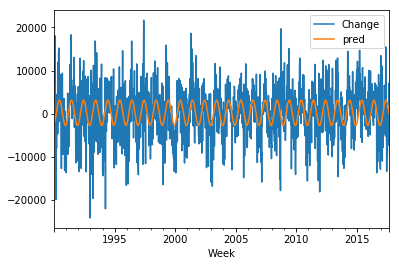

In [51]:
pet[['Change','pred']].plot()

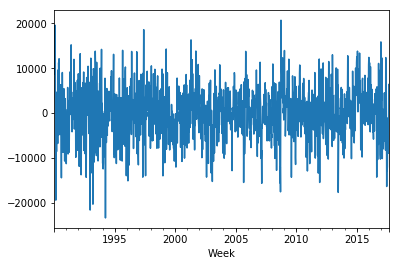

In [52]:
pet['resid'] = pet['Change'] - pet['pred']
pet['resid'].plot()

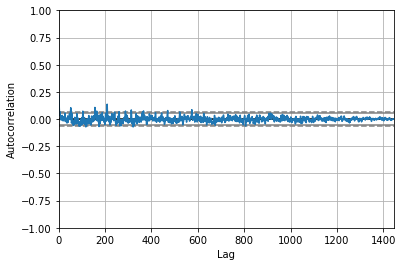

In [53]:
autocorrelation_plot(pet['resid'])